In [15]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy
import PIL
import requests

In [16]:
# load data, removing spaces in column headers
columns = ["Customer_ID", "Age", "Gender", "Item_Purchased", "Item_Category", "Purchase_Amount_(USD)", "Location", "Color", "Season", "Review_Rating", "Subscription_Status", "Shipping_Type", "Discount_Applied", "Promo_Code_Used", "Previous_Purchases", "Payment Method", "Frequency of Purchases"]
df = pd.read_csv("../data/Customers3.csv", header = 0, names = columns)
df

# data cleaning needed - missing fields, typos; class imbalances (gender, purchased items, etc.)

,Customer_ID,Age,Gender,Item_Purchased,Item_Category,Purchase_Amount_(USD),Location,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [17]:
# typo checking!
for i in df.columns:
    print(df[i].unique()) # ex: print(df["Gender"].unique())

[   1    2    3 ... 3898 3899 3900]
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
['Male' 'Female']
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New Yor

In [18]:
# data cleaning - checking for null values
iN = df.isnull()
print(iN)

      Customer_ID    Age  Gender  Item_Purchased  Item_Category  \
0           False  False   False           False          False   
1           False  False   False           False          False   
2           False  False   False           False          False   
3           False  False   False           False          False   
4           False  False   False           False          False   
...           ...    ...     ...             ...            ...   
3895        False  False   False           False          False   
3896        False  False   False           False          False   
3897        False  False   False           False          False   
3898        False  False   False           False          False   
3899        False  False   False           False          False   

      Purchase_Amount_(USD)  Location  Color  Season  Review_Rating  \
0                     False     False  False   False          False   
1                     False     False  False   False 

In [19]:
# checking for missing values, by column indexes and iterating over its rows
all_cols = df.columns

for i in all_cols:
    bad_rows = df[df[i].isnull()].index.tolist()
    # bad_rows = df[df[i] == ''].index.tolist()
    # bad_rows = df.loc[df[i] == ' ']
    print(bad_rows)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [20]:
# dropping empty rows and checking if dataframe has changed shape - it hasn't = no empties!
# df.shape # (3900, 17)
drop_missing = df.dropna()
drop_missing.shape # (3900, 17)

(3900, 17)

In [21]:
print(df.isnull().sum())

Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Item_Category             0
Purchase_Amount_(USD)     0
Location                  0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [22]:
nulls_per_row = df.isnull().sum(axis=1)
print(nulls_per_row)

0       0
1       0
2       0
3       0
4       0
       ..
3895    0
3896    0
3897    0
3898    0
3899    0
Length: 3900, dtype: int64


In [23]:
print(df.dtypes)

Customer_ID                 int64
Age                         int64
Gender                     object
Item_Purchased             object
Item_Category              object
Purchase_Amount_(USD)       int64
Location                   object
Color                      object
Season                     object
Review_Rating             float64
Subscription_Status        object
Shipping_Type              object
Discount_Applied           object
Promo_Code_Used            object
Previous_Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [24]:
int_cols = df.select_dtypes(include='int64')
print("Int64 columns:\n", int_cols.columns)
null_counts = int_cols.isnull().sum()
print("Nulls in int64 columns:\n", null_counts)

Int64 columns:
 Index(['Customer_ID', 'Age', 'Purchase_Amount_(USD)', 'Previous_Purchases'], dtype='object')
Nulls in int64 columns:
 Customer_ID              0
Age                      0
Purchase_Amount_(USD)    0
Previous_Purchases       0
dtype: int64


In [25]:
df.isna().sum()
df.duplicated().sum()

0

C:\Users\aktur\AppData\Local\Temp\ipykernel_7564\1193560594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Age Group', order=labels, palette='muted')


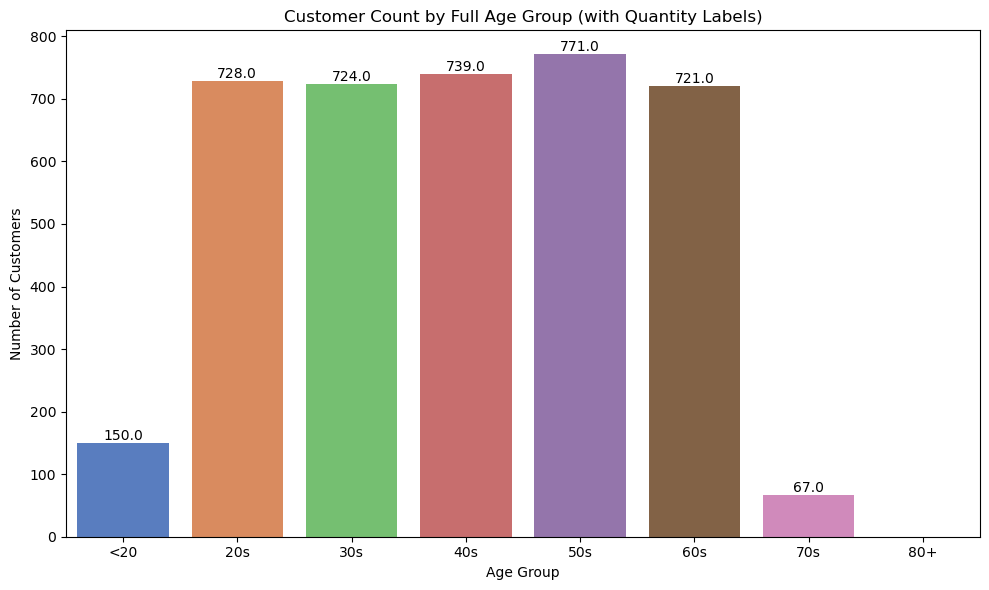

In [32]:

# Plot with count annotations on each bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', order=labels, palette='muted')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Customer Count by Full Age Group (with Quantity Labels)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



C:\Users\aktur\AppData\Local\Temp\ipykernel_7564\3325248729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_purchase = df.groupby(['Age Group', 'Gender'])['Purchase_Amount_(USD)'].mean().reset_index()


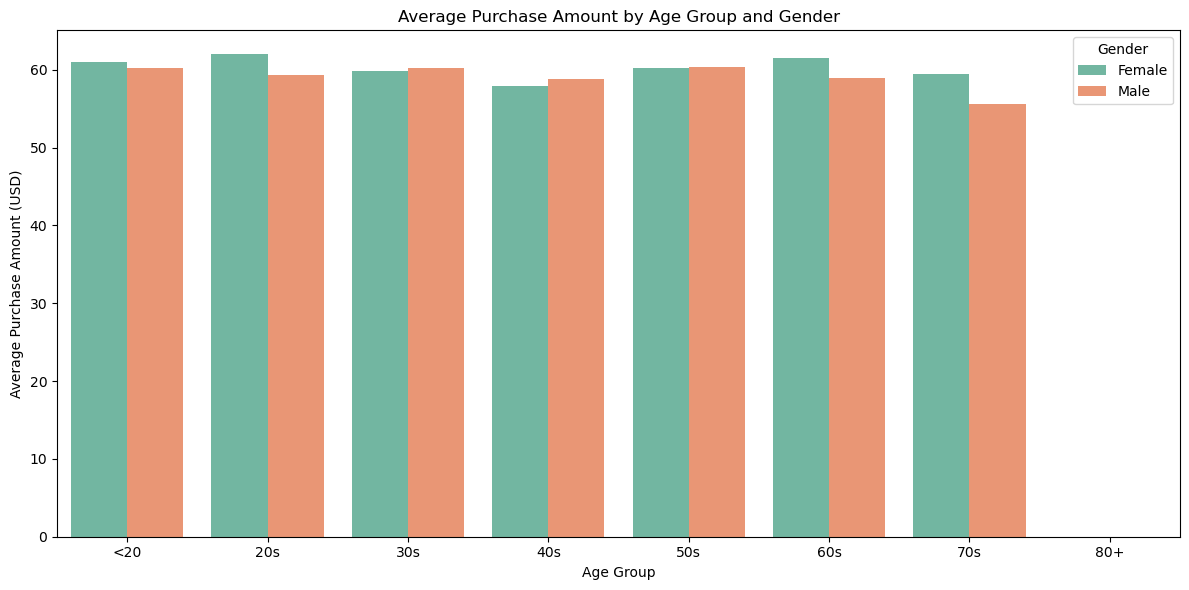

In [35]:
grouped_purchase = df.groupby(['Age Group', 'Gender'])['Purchase_Amount_(USD)'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_purchase,
            x='Age Group',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80+'],
            palette='Set2')

plt.title('Average Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()




In [ ]:
loc_counts=df.groupby("Location").size().sort_values(ascending=False)
top_location=loc_counts.idxmax()
top_count=loc_counts.max()
print(f"Location with the highest number of purchases: {top_location} ({top_count})")

Location with the highest number of purchases: Montana (96)


C:\Users\aktur\AppData\Local\Temp\ipykernel_7564\3659835368.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top30,


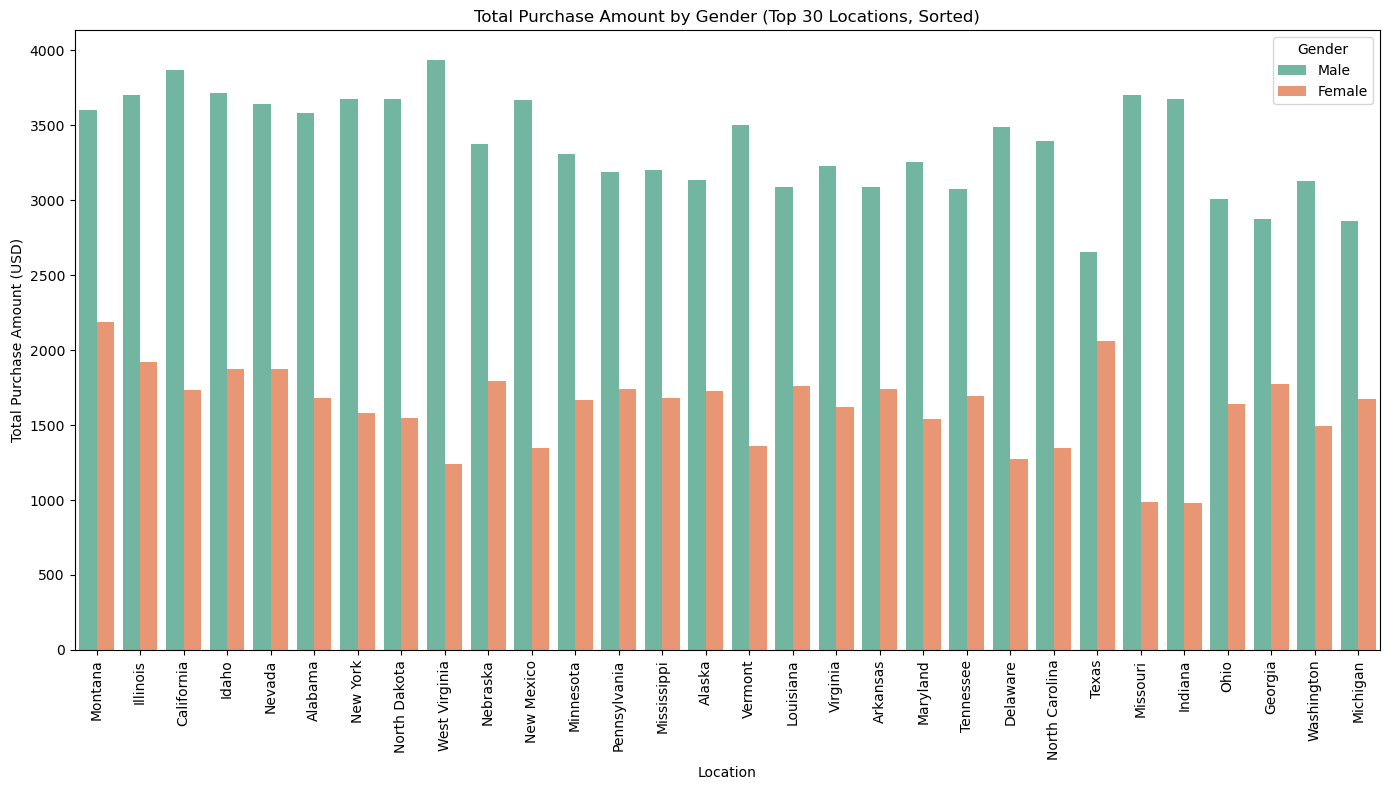

In [60]:
# Get top 30 locations by total purchase amount
top30_locations = df.groupby('Location')['Purchase_Amount_(USD)'].sum().nlargest(30).index
df_top30 = df[df['Location'].isin(top30_locations)]

# Sort by total purchase amount (not average this time)
location_order = (
    df_top30.groupby('Location')['Purchase_Amount_(USD)']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Plot total purchase amount by gender and location
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top30,
            x='Location',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=location_order,
            estimator=sum,
            ci=None,
            palette='Set2')

plt.title('Total Purchase Amount by Gender (Top 30 Locations, Sorted)')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()






C:\Users\aktur\AppData\Local\Temp\ipykernel_7564\695418559.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top30,


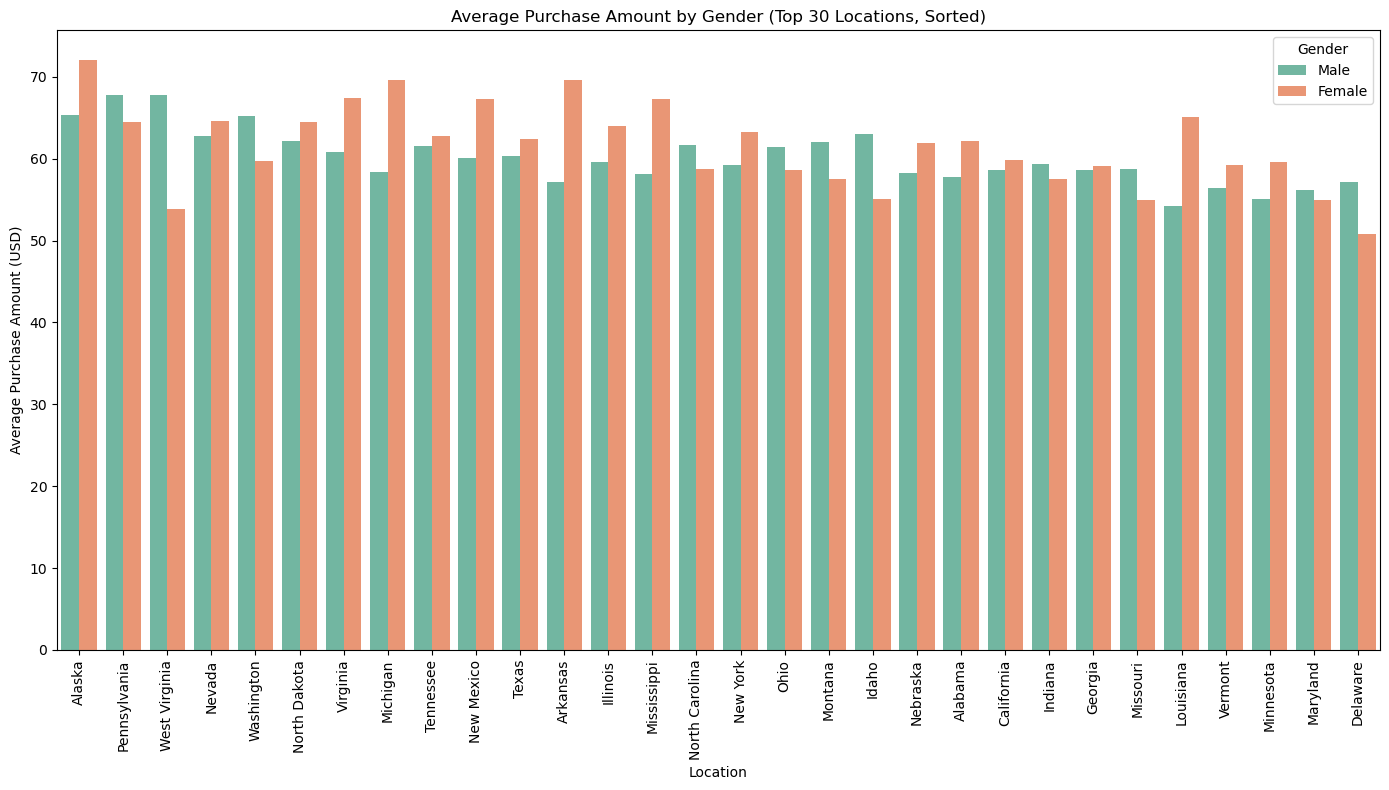

In [62]:
# Get top 30 locations by total purchase amount (using restored column name)
top30_locations = df.groupby('Location')['Purchase_Amount_(USD)'].sum().nlargest(30).index
df_top30 = df[df['Location'].isin(top30_locations)]

# Sort locations by average purchase amount
location_order = (
    df_top30.groupby('Location')['Purchase_Amount_(USD)']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plot the result
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top30,
            x='Location',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=location_order,
            ci=None,
            palette='Set2')

plt.title('Average Purchase Amount by Gender (Top 30 Locations, Sorted)')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
